In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [29]:
accels = [1.0, 2.0, 3.0]

In [60]:
a = 0
b = 90
c = 90
def convert(accels):
    x = accels[0] * math.cos(math.radians(c)) * math.cos(math.radians(b)) - accels[1] * math.sin(math.radians(c)) - accels[2] * math.sin(math.radians(b)) * math.cos(math.radians(c))
    y = accels[1] * math.cos(math.radians(c)) * math.cos(math.radians(a)) + accels[0] * math.sin(math.radians(c)) - accels[2] * math.sin(math.radians(a)) * math.cos(math.radians(c))
    z = accels[2] * math.cos(math.radians(a)) * math.cos(math.radians(b)) - accels[1] * math.sin(math.radians(a)) + accels[0] * math.sin(math.radians(b)) * math.cos(math.radians(a))
    return [round(x, 3), round(y, 3), round(z, 3)]

In [61]:
print(accels)
print(convert(accels))

[1.0, 2.0, 3.0]
[-2.0, 1.0, 1.0]


In [3]:
glo_lacc_x = np.loadtxt("../Data/Raw/train/Bag/Glo_LAcc_x_ver3.txt")
glo_lacc_x.shape

(196072, 500)

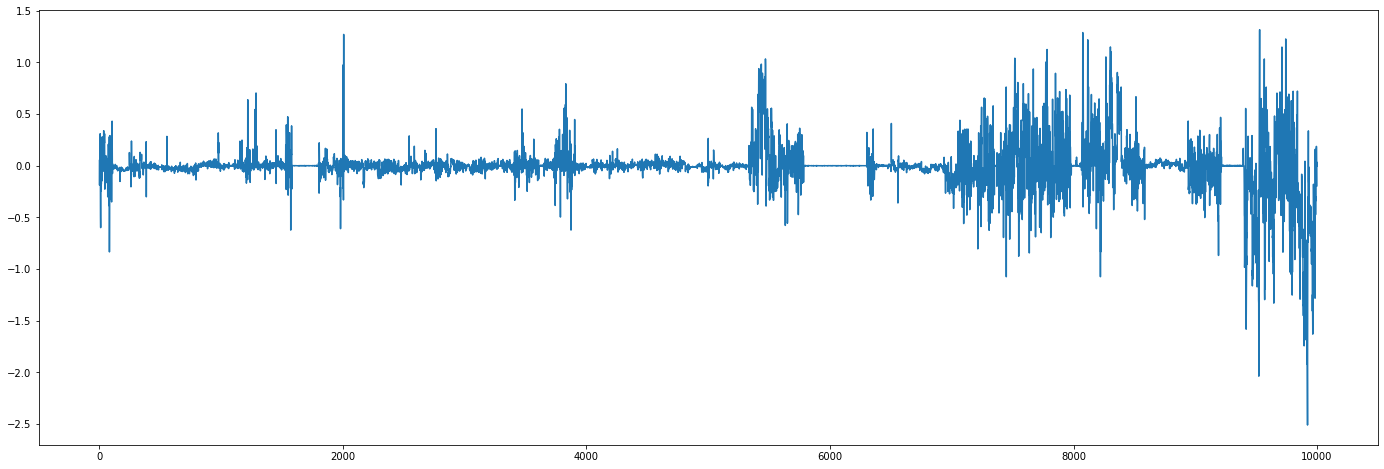

In [4]:
plt.figure(figsize=(24, 8))
plt.plot(glo_lacc_x[:10000].mean(axis=1))
# plt.ylim(-1, 1)

In [5]:
glo_lacc_x = np.loadtxt("../Data/Raw/train/Bag/Glo_LAcc_x_ver2.txt")
glo_lacc_x.shape

(196072, 500)

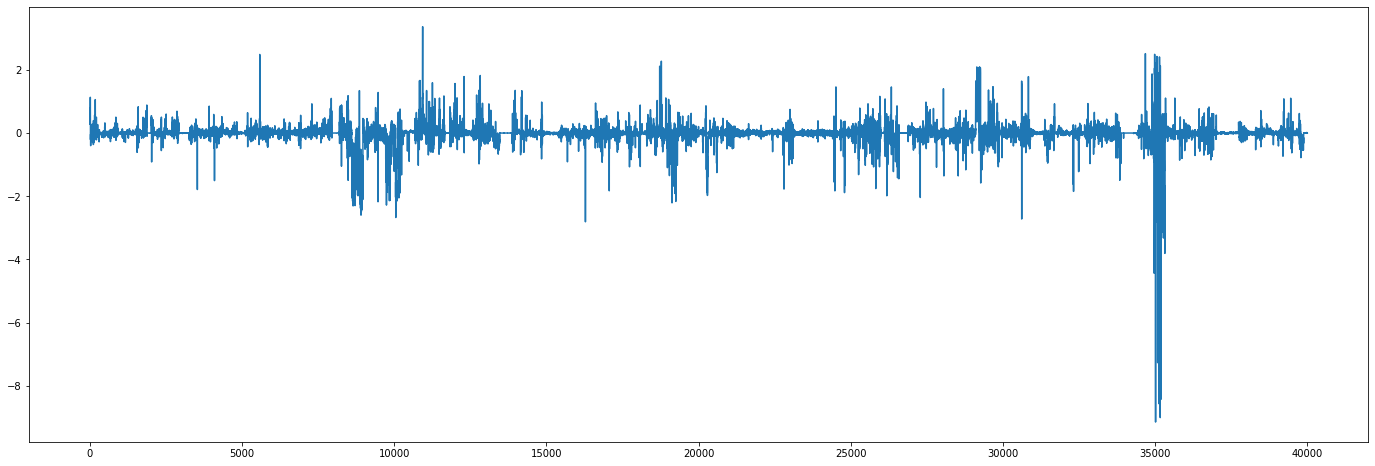

In [9]:
plt.figure(figsize=(24, 8))
plt.plot(glo_lacc_x[10000:50000].mean(axis=1))
# plt.ylim(-2.5, 1.5)

# TrainデータのNGラベル除いてnpyファイル化する

In [2]:
label = np.loadtxt("../Data/Raw/train/Bag/Label.txt")
label.shape

(196072, 500)

In [3]:
from tqdm import tqdm
NGindex = []
for i in tqdm(range(label.shape[0])):
    if np.unique(label[i]).size > 1:
        NGindex.append(i)

100%|██████████████████████████████████████████████████████████████████████| 196072/196072 [00:01<00:00, 108166.37it/s]


In [4]:
def ReturnUnique(x):
    return np.delete(x, NGindex, 0)

In [29]:
def loadtxt(hold_position):
    file_path = "../Data/Raw/train/" + hold_position + "/Glo_LAcc_"
    x = np.loadtxt(file_path + "x_ver3.txt")
    y = np.loadtxt(file_path + "y_ver3.txt")
    z = np.loadtxt(file_path + "z_ver3.txt")
    x = ReturnUnique(x).reshape([-1, 500, 1])
    y = ReturnUnique(y).reshape([-1, 500, 1])
    z = ReturnUnique(z).reshape([-1, 500, 1])
    result = np.concatenate([x, y, z], axis=2)
    np.save("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_LAcc_ver3", result)

In [30]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]

for hold_position in tqdm(hold_positions):
    loadtxt(hold_position)


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [18:15<00:00, 273.86s/it]


In [28]:
a = np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Glo_LAcc_ver2.npy")
a.shape

(195491, 500, 3)

In [39]:
def loadtxt(hold_position):
    file_path = "../Data/Raw/validation/" + hold_position + "/Glo_LAcc_"
    x = np.loadtxt(file_path + "x_ver2.txt").reshape([-1, 500, 1])
    y = np.loadtxt(file_path + "y_ver2.txt").reshape([-1, 500, 1])
    z = np.loadtxt(file_path + "z_ver2.txt").reshape([-1, 500, 1])
    result = np.concatenate([x, y, z], axis=2)
    np.save("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_LAcc_ver2", result)

In [40]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]

for hold_position in tqdm(hold_positions):
    loadtxt(hold_position)


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:58<00:00, 44.65s/it]


In [41]:
def loadtxt(hold_position):
    file_path = "../Data/Raw/validation/" + hold_position + "/Glo_LAcc_"
    x = np.loadtxt(file_path + "x_ver3.txt").reshape([-1, 500, 1])
    y = np.loadtxt(file_path + "y_ver3.txt").reshape([-1, 500, 1])
    z = np.loadtxt(file_path + "z_ver3.txt").reshape([-1, 500, 1])
    result = np.concatenate([x, y, z], axis=2)
    np.save("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_LAcc_ver3", result)

In [42]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]

for hold_position in tqdm(hold_positions):
    loadtxt(hold_position)


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:31<00:00, 37.99s/it]


In [43]:
def loadtxt():
    file_path = "../Data/Raw/test/Glo_LAcc_"
    x = np.loadtxt(file_path + "x_ver2.txt").reshape([-1, 500, 1])
    y = np.loadtxt(file_path + "y_ver2.txt").reshape([-1, 500, 1])
    z = np.loadtxt(file_path + "z_ver2.txt").reshape([-1, 500, 1])
    result = np.concatenate([x, y, z], axis=2)
    np.save("../Data/センサ別npyファイル/test/test_Glo_LAcc_ver2", result)

In [44]:
loadtxt()

In [45]:
def loadtxt():
    file_path = "../Data/Raw/test/Glo_LAcc_"
    x = np.loadtxt(file_path + "x_ver3.txt").reshape([-1, 500, 1])
    y = np.loadtxt(file_path + "y_ver3.txt").reshape([-1, 500, 1])
    z = np.loadtxt(file_path + "z_ver3.txt").reshape([-1, 500, 1])
    result = np.concatenate([x, y, z], axis=2)
    np.save("../Data/センサ別npyファイル/test/test_Glo_LAcc_ver3", result)

In [46]:
loadtxt()